# Analyze visually evoked responses (ERPs) 

## Set-up

#### Set path

In [1]:
# Define paths
REPO_PATH = r"C:\Users\Andre\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'


#### Imports

In [2]:
# general
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import odml
from scipy.signal import find_peaks, peak_widths

# custom
import sys
sys.path.append(REPO_PATH)
from scripts.plots import plot_schematic

#### Settings

In [3]:
# Session of interest (will ultimately apply to all sessions)
SESSIONS = ["A_SNR_140819", "L_SNR_250717", "A_SNR_041018"]
SESSION = "A_SNR_140819"

# Dataset details
FS = 500 # sampling frequency
N_CHANS = 64

# global variables
T_MIN = -300
STIM_DURATOIN = 400
N_ARRAYS = 16
N_SAMPLES = 500 



#### Functions

## Main

#### Create output directory

In [4]:
dir_out = f"{PROJECT_PATH}/figures/erp"
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

#### load data

In [5]:
# load example LFP epochs
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
fname_in = fr"{dir_input}\NSP1_array1_LFP.npy"
lfp = np.load(fname_in)
print(f"LFP Shape: \t{lfp.shape} (trials x channels x samples)")

LFP Shape: 	(170, 64, 500) (trials x channels x samples)


In [6]:
# load metadata for example sessions
odml_path = fr"{PROJECT_PATH}\data\dataset\{SESSION}\metadata_{SESSION}.odml"
metadata = odml.load(odml_path)

warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.


### Compute ERP

In [13]:
# average over trials
erp = np.mean(lfp, axis=0)
print(f"ERP Shape: \t{erp.shape} (channels x samples)")

ERP Shape: 	(64, 500) (channels x samples)


### Plot ERP

Text(0, 0.5, 'Voltage (uV)')

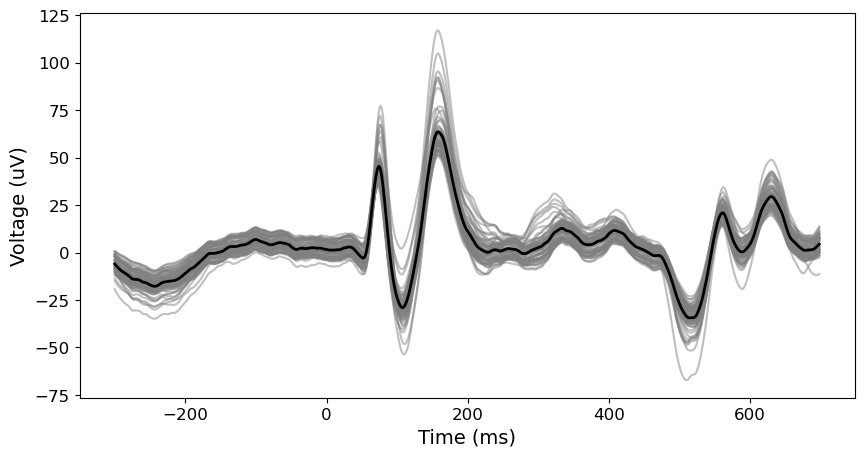

In [14]:

# init time-vector
time = np.arange(-0.3, 0.7, 1/FS) * 1000

# plot erp
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, erp.T, color='grey', alpha=0.5) # plot each channel 
ax.plot(time, np.mean(erp, axis=0), color='k', linewidth=2) # plot average across channels

ax.set_xlabel("Time (ms)")
ax.set_ylabel("Voltage (uV)")

In [15]:
def plot_erp(erp, time, ax=None, title=None):
    # creat fig
    if ax is None:
        ax_in = False
        fig, ax = plt.subplots(figsize=[8,4])
    else:
        ax_in = True

    # plot
    ax.plot(time, erp.T, color='grey', alpha=0.5)
    ax.plot(time, np.mean(erp, axis=0), color='k', linewidth=2) # plot average across channels
    
    # label
    ax.set_xlabel("Time (ms)")
    ax.set_ylabel("Voltage (uV)")
    if not title is None:
        ax.set_title(title)

    # annotate
    ax.axvline(0, color='k', linestyle='--')
    ax.axvline(400, color='k', linestyle='--')

    if ax_in:
        return ax
    else:
        return fig, ax

In [16]:
# plotting for each array in a session

# define input/output path
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
dir_fig = f"{dir_out}/{SESSION}"
if not os.path.exists(dir_fig):
    os.makedirs(dir_fig)

# init
time = np.arange(-0.3, 0.7, 1/FS) * 1000 # init time-vector
idx_nsp = 1

# loop through arrays
for i_array in range(1, N_ARRAYS+1):
    # load data
    fname_in = f"NSP{idx_nsp}_array{i_array}_LFP.npy"
    lfp = np.load(f"{dir_input}/{fname_in}")

    # compute erp
    erp = np.mean(lfp, axis=0)

    # plot
    fig, ax = plot_erp(erp, time, title=f"{SESSION} - {fname_in.replace('_lfp.npy','')}")
    fig.savefig(f"{dir_fig}/{fname_in.replace('.npy','.png')}")
    plt.close('all')

    # increment
    if i_array % 2 == 0:
        idx_nsp += 1


In [17]:
# repeat for all sessions - plot each array in session

# init
time = np.arange(-0.3, 0.7, 1/FS) * 1000 # init time-vector

for session in SESSIONS:
    print(f"\nPlotting session: {session}")
    # define input/output path
    dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{session}"
    dir_fig = f"{dir_out}/{session}"
    if not os.path.exists(dir_fig):
        os.makedirs(dir_fig)

    idx_nsp = 1
    # loop through arrays
    for i_array in range(1, N_ARRAYS+1):
        print(f"    plotting array: {i_array}/{N_ARRAYS}")
        
        # load data
        fname_in = f"NSP{idx_nsp}_array{i_array}_LFP.npy"
        lfp = np.load(f"{dir_input}/{fname_in}")

        # compute erp
        erp = np.mean(lfp, axis=0)

        # plot
        fig, ax = plot_erp(erp, time, title=f"{session} - {fname_in.replace('_lfp.npy','')}")
        fig.savefig(f"{dir_fig}/{fname_in.replace('.npy','.png')}")
        plt.close('all')

        # increment
        if i_array % 2 == 0:
            idx_nsp += 1



Plotting session: A_SNR_140819
    plotting array: 1/16
    plotting array: 2/16
    plotting array: 3/16
    plotting array: 4/16
    plotting array: 5/16
    plotting array: 6/16
    plotting array: 7/16
    plotting array: 8/16
    plotting array: 9/16
    plotting array: 10/16
    plotting array: 11/16
    plotting array: 12/16
    plotting array: 13/16
    plotting array: 14/16
    plotting array: 15/16
    plotting array: 16/16

Plotting session: L_SNR_250717
    plotting array: 1/16
    plotting array: 2/16
    plotting array: 3/16
    plotting array: 4/16
    plotting array: 5/16
    plotting array: 6/16
    plotting array: 7/16
    plotting array: 8/16
    plotting array: 9/16
    plotting array: 10/16
    plotting array: 11/16
    plotting array: 12/16
    plotting array: 13/16
    plotting array: 14/16
    plotting array: 15/16
    plotting array: 16/16

Plotting session: A_SNR_041018
    plotting array: 1/16
    plotting array: 2/16
    plotting array: 3/16
    plotting ar

In [18]:
# plotting the mean for each array in a session
dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{SESSION}"
idx_nsp = 1

# create empty array for erp mean
erps= np.zeros([N_ARRAYS,N_CHANS, N_SAMPLES])

# init time-vector
time = np.arange(-0.3, 0.7, 1/FS) * 1000

for i_array in range(1, N_ARRAYS):
    fname_in = fr"{dir_input}\NSP{idx_nsp}_array{i_array}_LFP.npy"
    lfp = np.load(fname_in)

    erp = np.mean(lfp, axis=0)

    erps[i_array-1] = erp

    # increment
    if i_array % 2 == 0:
        idx_nsp += 1

erp_array = np.mean(erps, axis=1)
erp_array.shape

(16, 500)

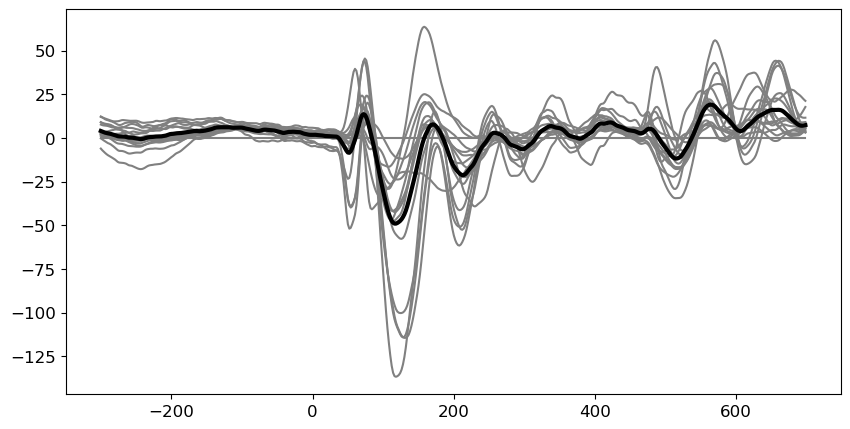

In [19]:
# plot mean of all arrays
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, erp_array.T, color='grey')
ax.plot(time, np.mean(erp_array, axis=0), color='k', linewidth=3);

Plotting session: A_SNR_140819
Plotting session: L_SNR_250717
Plotting session: A_SNR_041018


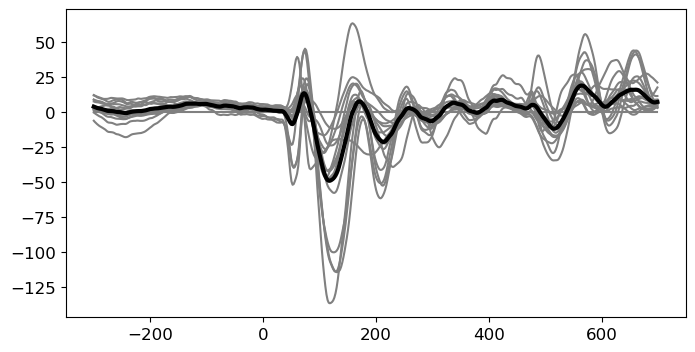

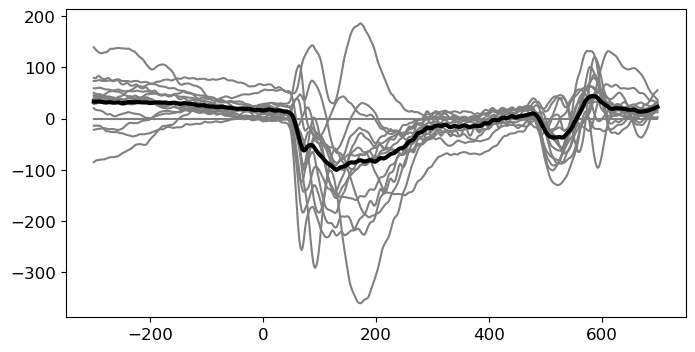

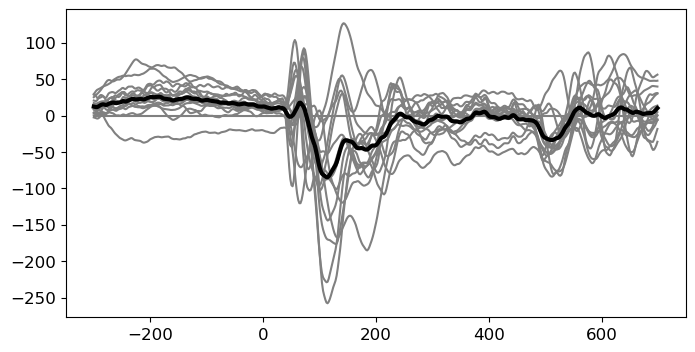

In [20]:

# init time-vector
time = np.arange(-0.3, 0.7, 1/FS) * 1000

# repeat for all sessions
for session in SESSIONS:
    print(f"Plotting session: {session}")

    # define input/output path
    dir_input = fr"G:\Shared drives\v1_v4_1024\data\lfp\lfp_epochs\{session}"
    dir_fig = f"{dir_out}/{session}"
    if not os.path.exists(dir_fig):
        os.makedirs(dir_fig)

    # create empty array for erp mean
    erps= np.zeros([N_ARRAYS,N_CHANS, N_SAMPLES])

    # loop arrays
    idx_nsp = 1
    for i_array in range(1, N_ARRAYS):
        # load lfp data
        fname_in = fr"{dir_input}\NSP{idx_nsp}_array{i_array}_LFP.npy"
        lfp = np.load(fname_in)
        erps[i_array-1] = np.mean(lfp, axis=0)

        # increment
        if i_array % 2 == 0:
            idx_nsp += 1

    # compute erp
    erp_array = np.mean(erps, axis=1)

    # plot mean of all arrays
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(time, erp_array.T, color='grey')
    ax.plot(time, np.mean(erp_array, axis=0), color='k', linewidth=3)
    plt.savefig(f"{dir_fig}/{session}_erp_array_mean.png")

In [21]:
# save mean of all arrays together
allarrays_mean = np.mean(erp_array, axis=0)

In [22]:
# find height param for peaks
mean = np.mean(allarrays_mean)
std = np.std(allarrays_mean)
height = mean + (std)
height

21.276140355303248

array([22.8535686 , 25.86559519, 25.12297874, 21.58941781])

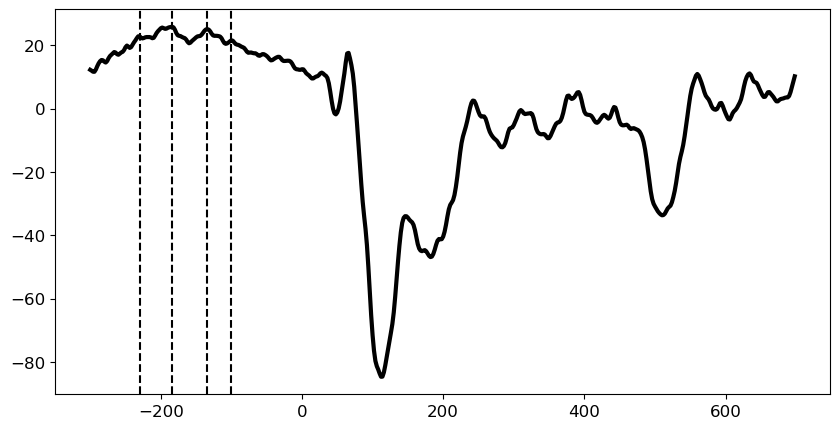

In [23]:
peaks_pos, properties_pos = find_peaks(allarrays_mean, height=height, distance = 10)
peaks_pos

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, allarrays_mean, color='k', linewidth=3)
for value in peaks_pos:
    ax.axvline(time[value], color='k', linestyle='--')

peak_posamp = allarrays_mean[peaks_pos]
peak_posamp

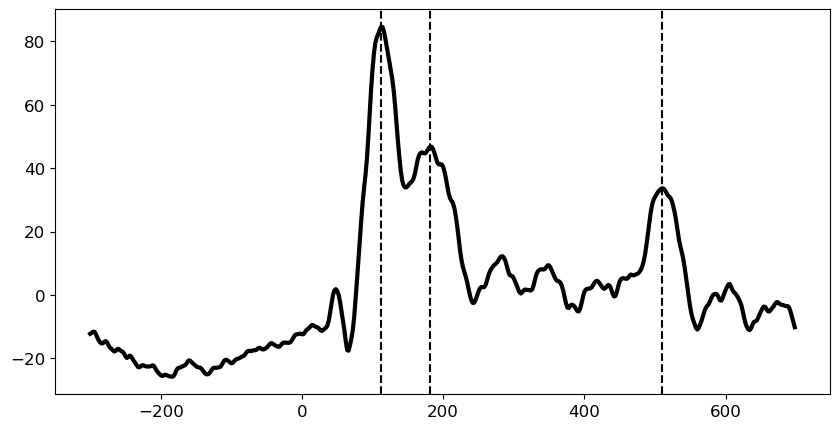

In [24]:
peaks_neg, properties_neg = find_peaks(-allarrays_mean, height=height, distance = 10)
peaks_neg

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, -allarrays_mean, color='k', linewidth=3)
for value in peaks_neg:
    ax.axvline(time[value], color='k', linestyle='--')

peak_negamp=allarrays_mean[peaks_neg]

array([22.8535686 , 25.86559519, 25.12297874, 21.58941781])

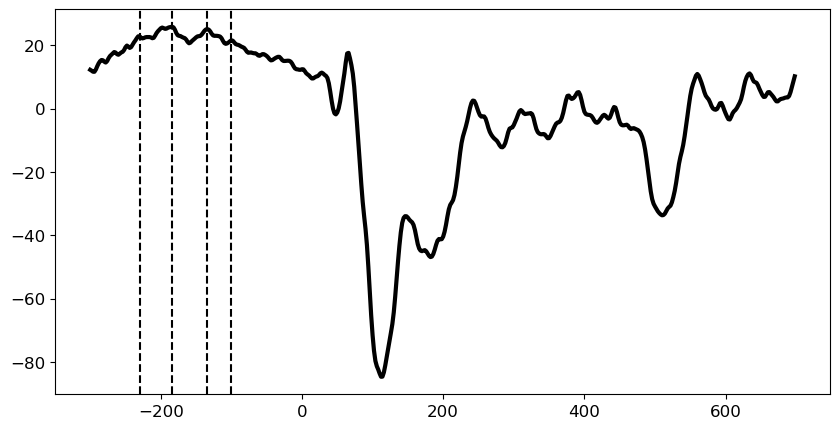

In [25]:

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time, allarrays_mean, color='k', linewidth=3)
for value in peaks_pos:
    ax.axvline(time[value], color='k', linestyle='--')

peak_posamp = allarrays_mean[peaks_pos]
peak_posamp

### Quantify ERP 

In [26]:
# define function to define ERP params (latency, amplitude, width) for grand-average ERP

def comp_erp_params(erp):
    # init
    params = pd.DataFrame()

    # use scipy.find_peaks to find parameters
    peaks_pos, _ = find_peaks(erp, height=height, distance = 10) 
    peaks_neg, _ = find_peaks(-erp, height=height, distance = 10)

    peaks = np.sort(np.concatenate([peaks_pos, peaks_neg]))
    order = np.argsort(np.concatenate([peaks_pos, peaks_neg])) #use to sort widths
    params['latency'] = peaks
    
    # amplitude
    params['amp'] = erp[peaks]

    # find peaks width
    widths_pos, _, _, _ = peak_widths(erp, peaks_pos)
    widths_neg, _, _, _ = peak_widths(-erp, peaks_neg)
    widths = np.concatenate([widths_pos, widths_neg])
    params['widths'] = widths[order]

    return params

    


In [27]:
def crop_erp(erp, time, t_window):
    mask = (time>=t_window[0]) & (time<=t_window[1])

    return erp[mask], time[mask]

In [28]:
T_MIN = -300
STIM_DURATOIN = 400
print(allarrays_mean.shape)

erp_crop, time_crop = crop_erp(allarrays_mean, time, [T_MIN, STIM_DURATOIN])
print(erp_crop.shape)

(500,)
(350,)


In [29]:
# compute for each channel
mean_params = comp_erp_params(erp_crop)
mean_params['latency'] = mean_params['latency']

In [30]:
mean_params.head()

,latency,amp,widths
0,35,22.853569,2.341486
1,58,25.865595,85.527322
2,83,25.122979,14.195888
3,100,21.589418,3.473929
4,206,-84.637122,24.498304


In [31]:
# plot schematic of ERP params


### Repeat across subjects

In [32]:
# create a dataframe with a column for the session, array, and each param
N_ARRAYS = 16
allsessions_list = []

for session in SESSIONS:
    idx_nsp = 1
    df_arraylist = []
    for i_array in range(1, N_ARRAYS+1):
        # create dataframe
        df_array = pd.DataFrame(columns = ['session', 'array', 'channel', 'latency', 'amp', 'widths'])

        fname_in = fr"{dir_input}\NSP{idx_nsp}_array{i_array}_LFP.npy"
        lfp = np.load(fname_in)

        erp = np.mean(lfp, axis=0)

        for channel in range(erp.shape[0]):
            erp_crop, time_crop = crop_erp(erp[channel], time, [T_MIN, STIM_DURATOIN])
            
            df_array = comp_erp_params(erp_crop)

            # add session, channel and array
            df_array['session'] = session
            df_array['channel'] = channel
            df_array['array'] = i_array
            
        df_arraylist.append(df_array)

        # increment
        if i_array % 2 == 0:
            idx_nsp += 1
    
    # save dataframe per session
    df_session = pd.concat(df_arraylist)
    df_session.to_csv(fr'G:\Shared drives\v1_v4_1024\data\results\{session}_erp_params_df.csv')

    # save all sessions dataframe
    allsessions_list.append(df_session)

df_allsessions = pd.concat(allsessions_list)
df_allsessions.to_csv(fr'G:\Shared drives\v1_v4_1024\data\results\allsessions_erp_params_df.csv')
    

        


In [33]:
df_allsessions['latency'].max()

344

In [34]:
df_max = df_allsessions.groupby(by=['session', 'array', 'channel']).apply(np.max, axis = 0)
df_max.to_csv(fr'G:\Shared drives\v1_v4_1024\data\results\max_erp_params_df.csv')


In [35]:

# df_max = df.groupby(by=['session','array','channel']).apply(np.max, axis=0)
# take mean of absolute values
df_max = df_allsessions.groupby(by=['session','array','channel']).apply(lambda x: np.mean(np.abs(x)))
df_max

latency        amp     widths
session      array channel                                  
A_SNR_041018 1     63       171.066667  55.415934  13.493470
             2     63       144.357143  73.108964  13.109760
             3     63       236.333333  44.664212  21.886515
             4     63       238.200000  26.592734  15.773879
             5     63       199.083333  55.248330  12.354447
             6     63       178.200000  74.677149  10.218032
             7     63       159.166667  54.198958  11.653255
             8     63       178.842105  61.043689  16.362185
             9     63       174.500000  48.700874  14.754062
             10    63       128.416667  42.704843   9.838556
             11    63       164.307692  59.909343  16.169304
             12    63       134.166667  45.689182  10.395875
             13    63       167.750000  39.078779  13.883687
             14    63       272.571429  65.669674  12.283957
             15    63       157.666667  48.294567  11.809176
             16    63       212.666667  88.579445  15.553277
A_SNR_140819 1     63       171.066667  55.415934  13.493470
             2     63       144.357143  73.108964  13.109760
             3     63       236.333333  44.664212  21.886515
             4     63       238.200000  26.592734  15.773879
             5     63       199.083333  55.248330  12.354447
             6     63       178.200000  74.677149  10.218032
             7     63       159.166667  54.198958  11.653255
             8     63       178.842105  61.043689  16.362185
             9     63       174.500000  48.700874  14.754062
             10    63       128.416667  42.704843   9.838556
             11    63       164.307692  59.909343  16.169304
             12    63       134.166667  45.689182  10.395875
             13    63       167.750000  39.078779  13.883687
             14    63       272.571429  65.669674  12.283957
             15    63       157.666667  48.294567  11.809176
             16    63       212.666667  88.579445  15.553277
L_SNR_250717 1     63       171.066667  55.415934  13.493470
             2     63       144.357143  73.108964  13.109760
             3     63       236.333333  44.664212  21.886515
             4     63       238.200000  26.592734  15.773879
             5     63       199.083333  55.248330  12.354447
             6     63       178.200000  74.677149  10.218032
             7     63       159.166667  54.198958  11.653255
             8     63       178.842105  61.043689  16.362185
             9     63       174.500000  48.700874  14.754062
             10    63       128.416667  42.704843   9.838556
             11    63       164.307692  59.909343  16.169304
             12    63       134.166667  45.689182  10.395875
             13    63       167.750000  39.078779  13.883687
             14    63       272.571429  65.669674  12.283957
             15    63       157.666667  48.294567  11.809176
             16    63       212.666667  88.579445  15.553277